## Logistic Regression (1D example)

In this example we have only one variable $x$. The parameter vector is $\boldsymbol\theta=\left(\theta_0,\theta_1\right)$.

Analogously to the exercises before, the code snippets in this notebook contain several gaps, which should be completed by you. 
The precise location of the gap is indicated by the expression *MY CODE*.

In [8]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
import math
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn

Consider the case, random numbers are created by two different gaussian distributions with identical variance and we also know the labels from which distribution each random number was originating from.

In [9]:
a=np.random.normal(5,0.7,100)
print (a)

[5.80814542 4.62363302 4.04466414 4.92781709 4.22916987 4.1714783
 5.84515351 5.06226225 5.63894017 5.24971297 4.54294629 3.9585667
 4.90657562 7.11121196 5.04425626 4.62357475 3.99644726 6.39692218
 5.40840188 5.42853776 4.77675195 5.74021875 5.87083622 5.24289757
 6.51224216 5.19105882 5.70424029 5.60467692 4.95492292 4.61054885
 3.57408297 5.64227753 2.83835235 6.28689163 5.02524334 4.11667288
 4.84425612 5.18131762 5.0724399  5.13486401 5.166069   5.19416297
 4.59874496 5.28083659 5.61828614 5.21919968 4.75641755 4.90997167
 4.23169246 5.29161539 4.62688579 4.1767498  4.96953214 4.22772394
 2.97190175 5.64590082 3.92434027 4.02552242 3.620279   5.70618361
 4.96348965 4.70562171 5.02046886 3.65641618 4.127638   4.4030367
 4.34807229 5.34235507 4.32206022 4.74767235 5.43278774 4.43255891
 5.54371266 4.62685132 5.07010487 4.50969091 4.390099   4.76847984
 4.62115091 5.2349884  5.14480091 6.11987995 5.97064543 5.04869938
 4.91000418 5.05462078 4.82863742 3.67696518 3.32023848 4.9973362

In [10]:
b=np.random.normal(2,0.7,100)
print(b)

[1.23460829 2.72022982 2.01070281 0.8754247  0.35832215 1.63263053
 1.19748194 1.86478322 2.30134496 2.24337752 1.35561129 1.82916351
 1.27492476 1.58077441 2.23810052 1.81900074 2.79046786 1.62841976
 1.98655108 3.35149681 1.95145762 1.89210659 1.55690311 1.90574872
 2.72461721 3.23927388 3.10018276 3.30324795 2.07063544 0.82420355
 2.90091416 1.87599154 1.52774855 1.0741964  2.60058437 3.21895849
 1.4353768  3.25801126 2.4580515  2.00124699 2.98922863 2.95705266
 3.20312002 0.97285082 0.78373037 1.49929814 2.2331051  3.41384039
 1.24465255 1.44584073 1.03640116 0.75248297 1.1307515  2.5502017
 1.47341031 1.62674852 2.4472511  1.88591616 1.79784967 1.93067682
 2.63946556 2.36018086 2.29925688 1.36002395 2.12110301 3.0582045
 1.52435783 2.11057195 4.15562496 2.14729855 2.21278019 0.8945417
 2.29214926 1.38548853 1.58650916 2.13765863 1.92823103 0.99239625
 1.69638822 1.11875142 2.26686889 0.65644479 2.37750296 2.08381512
 2.84879201 1.88805762 1.01977269 1.84498525 1.35631605 2.0203308

We plot both type of points in a common diagram, where the points generated by the first distribution are plotted in orange at y=1, while the points of the second distribution are plotted in blue at y=0.

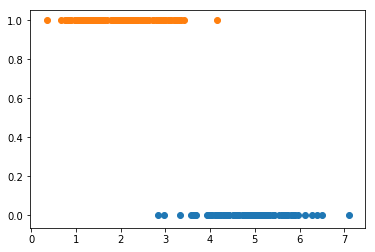

In [11]:
zeros=[0]*100
ag=np.column_stack((zeros,a))
ones=[1]*100
bg=np.column_stack((ones,b))
plt.scatter(a,zeros)
plt.scatter(b,ones)
plt.show()

Now we would like to determine, if an arbitrary previously unseen point belongs rather to class $y=0$ or to class $y=1$. For that, we want to employ logistic regression. Similar to linear regression, we firt consider a model with a single independent variable $x$ and two bias parameters $\theta_0,\theta_1$.

The probability, that $x$ belongs to either of the two classes is determined using the logistic function

$$
  \sigma(x) = \frac{1}{1+\exp(-x\theta_1-\theta_0)}
$$

In [12]:
def logistic_function(x,b0,b1):
    *YOUR_CODE* 

SyntaxError: invalid syntax (<ipython-input-12-0beb09a496c3>, line 2)

For applying gradient descent, we define the two gradients. First the partial derivative with respect to $\theta_0$ (the first component of the gradient)

In [13]:
def gradient0(X,y,theta0,theta1):
    num_rows=X.shape[0]
    s=0.0
    for i in range(0,num_rows):
        s=s+(logistic_function(X[i],theta0,theta1)-y[i])
    return s
    

Then the partial derivative with respect to $\theta_1$ (the second component of the gradient)

In [14]:
def gradient1(X,y,theta0,theta1):
    *YOUR CODE* Note that the function gradient1 is not identical with gradient0 !

SyntaxError: invalid syntax (<ipython-input-14-07e096cee9a8>, line 2)

The cost function $J(\boldsymbol\theta)$, where $\boldsymbol\theta=\left(\theta_0,\theta_1\right)$ is given by

$$
    J(\boldsymbol\theta) =
      - \frac{1}{n} \sum_{i=1}^n%
        \left[y_i\log h(\boldsymbol\theta,\mathbf{X_i})
            + (1-y_i)\log\left(
               1-h(\boldsymbol\theta,\mathbf{X_i})\right)\right]
$$

where $h(\boldsymbol\theta,\mathbf{X_i})=\sigma\left(\mathbf{X_i}^T\boldsymbol\theta\right)=\sigma\left(\theta_0+\theta_1 x\right)$ and $\sigma$ is the sigmoid function.

In [15]:
def cost_function(X,y,theta0,theta1):
    *YOUR CODE *

SyntaxError: invalid syntax (<ipython-input-15-28f07e77ffe1>, line 2)

To fit our logistic regression model, we combine the vectors a and b in one vector

In [7]:
X=np.concatenate((a,b))
print(X)

array([4.83443978, 5.06794408, 4.9845304 , 4.33718709, 4.7229978 ,
       4.24639281, 5.65445066, 5.64570183, 6.45915456, 5.74815776,
       5.10219369, 5.08533659, 5.85931917, 4.77251822, 5.09122056,
       5.95222207, 5.14725238, 4.88159358, 3.22946938, 5.37126987,
       5.85586251, 5.51882345, 4.09259024, 4.32520175, 4.64197044,
       3.96620314, 5.18873038, 5.25717576, 5.27475626, 5.22118946,
       5.01449418, 4.67255082, 5.71153116, 4.21971602, 5.50971962,
       4.67447099, 5.98645983, 5.4131741 , 4.16128171, 6.07370823,
       4.44943415, 5.59600841, 5.38174294, 6.04217264, 4.43848294,
       3.69180004, 4.58638857, 5.16901224, 5.2531281 , 4.44336059,
       4.53584869, 4.85503201, 3.4482925 , 5.01529065, 5.6842763 ,
       4.62720959, 5.49038515, 4.67535069, 5.3629952 , 4.52469583,
       4.92787137, 5.98489741, 4.92005465, 5.430929  , 5.5108261 ,
       5.93818717, 3.93843135, 4.98548164, 4.93412048, 5.22549071,
       5.46698425, 6.10127567, 4.95417395, 5.06733355, 5.29166

Analogously, we build our vector y

In [71]:
y=np.concatenate((zeros,ones))
print(y)

Now we are ready to determine the optimal values for the parameters $\theta_0$ and $\theta_1$.

We set the initial values to 1

In [116]:
theta0=1.0
theta1=1.0

Define the learning rate $\alpha$

In [117]:
alpha=0.001

Lets do 1000 iterations

In [118]:
num_iterations=1000

In [119]:
for i in range(0,num_iterations):
    gr0=gradient0(X,y,theta0,theta1)
    gr1=gradient1(X,y,theta0,theta1)
    costs=cost_function(X,y,theta0,theta1)
    print ("current costs: ",costs)
    print ("current parameters: ",theta0,",",theta1)
    theta0=theta0-alpha*gr0
    theta1=theta1-alpha*gr1
    

current costs:  -3.0095882667280516
current parameters:  1.0 , 1.0
current costs:  -1.8172902291557858
current parameters:  0.9061877258864599 , 0.5151378229549637
current costs:  -0.863370861139358
current parameters:  0.8226597674617616 , 0.05835288341555023
current costs:  -0.5244691246974604
current parameters:  0.7755532184110961 , -0.2597884475005084
current costs:  -0.4943201869286933
current parameters:  0.7815441127523433 , -0.3535307002357522
current costs:  -0.4875367887701239
current parameters:  0.8017902335667834 , -0.3882096327403058
current costs:  -0.4832136865772235
current parameters:  0.8260750672224502 , -0.4059425956314387
current costs:  -0.47931506990037553
current parameters:  0.8517498377832998 , -0.4173321174768151
current costs:  -0.4755387090060887
current parameters:  0.8778729328821416 , -0.4261017584387656
current costs:  -0.47183185316949844
current parameters:  0.9040689998844056 , -0.4337316582037608
current costs:  -0.468183998714224
current paramete

current parameters:  2.823276526435516 , -0.9409076812798737
current costs:  -0.269750785402259
current parameters:  2.8371958667834885 , -0.9446528628705417
current costs:  -0.26872446072553396
current parameters:  2.8510474663753493 , -0.9483805441979877
current costs:  -0.2677080193652579
current parameters:  2.8648319569022975 , -0.952090879506369
current costs:  -0.26670132273367864
current parameters:  2.8785499619186097 , -0.9557840212157459
current costs:  -0.26570423471233
current parameters:  2.892202096966254 , -0.9594601199461109
current costs:  -0.26471662160031556
current parameters:  2.905788969697519 , -0.9631193245411556
current costs:  -0.2637383520637912
current parameters:  2.919311179995683 , -0.9667617820917735
current costs:  -0.26276929708662056
current parameters:  2.9327693200937452 , -0.9703876379592978
current costs:  -0.2618093299221723
current parameters:  2.946163974691252 , -0.9739970357984714
current costs:  -0.26085832604623443
current parameters:  2.9

current costs:  -0.207820864567371
current parameters:  3.8236540155566883 , -1.2116568296057533
current costs:  -0.20730847202793298
current parameters:  3.833430692993649 , -1.2143162016221154
current costs:  -0.2067996056234076
current parameters:  3.8431735887603864 , -1.2169665985038511
current costs:  -0.20629422893580598
current parameters:  3.852882936954141 , -1.2196080806667469
current costs:  -0.20579230604101312
current parameters:  3.862558969308451 , -1.2222407079390463
current costs:  -0.2052938015006054
current parameters:  3.8722019152237097 , -1.2248645395686728
current costs:  -0.20479868035382356
current parameters:  3.8818120017972517 , -1.227479634230348
current costs:  -0.20430690810970187
current parameters:  3.8913894538529785 , -1.230086050032608
current costs:  -0.203818450739349
current parameters:  3.900934493970531 , -1.2326838445247201
current costs:  -0.2033332746683762
current parameters:  3.910447342514015 , -1.2352730747035006
current costs:  -0.20285

current costs:  -0.1561219508354486
current parameters:  5.032662023168528 , -1.5418726809595076
current costs:  -0.15590273651628023
current parameters:  5.039051486419147 , -1.5436237964231003
current costs:  -0.1556844947229491
current parameters:  5.045426739378976 , -1.545371068614536
current costs:  -0.15546721887535345
current parameters:  5.0517878469195505 , -1.5471145148274046
current costs:  -0.15525090245291032
current parameters:  5.058134873468882 , -1.5488541522390311
current costs:  -0.15503553899388478
current parameters:  5.0644678830154515 , -1.5505899979115028
current costs:  -0.15482112209472987
current parameters:  5.070786939112162 , -1.5523220687926842
current costs:  -0.15460764540943323
current parameters:  5.077092104880247 , -1.5540503817172233
current costs:  -0.15439510264887418
current parameters:  5.083383443013134 , -1.555774953407544
current costs:  -0.15418348758018832
current parameters:  5.089661015780269 , -1.55749580047483
current costs:  -0.15397

current parameters:  5.6363338407959995 , -1.707525615468097
current costs:  -0.1372682045693784
current parameters:  5.641517871411885 , -1.7089498390064644
current costs:  -0.1371243338947922
current parameters:  5.646692663579126 , -1.710371550610356
current costs:  -0.13698097396690165
current parameters:  5.6518582512284326 , -1.7117907594082606
current costs:  -0.13683812201239
current parameters:  5.6570146681024776 , -1.713207474478675
current costs:  -0.13669577527816645
current parameters:  5.662161947757278 , -1.714621704850466
current costs:  -0.13655393103118113
current parameters:  5.667300123563567 , -1.7160334595032307
current costs:  -0.1364125865582431
current parameters:  5.67242922870815 , -1.717442747367653
current costs:  -0.13627173916583968
current parameters:  5.6775492961952505 , -1.7188495773258559
current costs:  -0.1361313861799579
current parameters:  5.682660358847844 , -1.720253958211751
current costs:  -0.13599152494590822
current parameters:  5.6877624

current costs:  -0.1187801496936586
current parameters:  6.395134058620473 , -1.916247223779782
current costs:  -0.11869407825658598
current parameters:  6.399135524472487 , -1.9173491353222947
current costs:  -0.11860823937711804
current parameters:  6.40313157589384 , -1.9184495676636992
current costs:  -0.11852263209396238
current parameters:  6.407122227984773 , -1.9195485248986273
current costs:  -0.11843725545118083
current parameters:  6.411107495781574 , -1.9206460111045076
current costs:  -0.11835210849815363
current parameters:  6.415087394256948 , -1.9217420303416624
current costs:  -0.11826719028954115
current parameters:  6.419061938320366 , -1.9228365866534025
current costs:  -0.11818249988524741
current parameters:  6.423031142818431 , -1.9239296840661233
current costs:  -0.1180980363503838
current parameters:  6.426995022535223 , -1.9250213265893983
current costs:  -0.11801379875523246
current parameters:  6.430953592192658 , -1.9261115182160733
current costs:  -0.11792

current parameters:  6.994881372972914 , -2.0815278255611163
current costs:  -0.10703313733614575
current parameters:  6.998151939573855 , -2.0824297839552797
current costs:  -0.10697574364107927
current parameters:  7.001418932280999 , -2.0833307632968645
current costs:  -0.1069184750714338
current parameters:  7.004682359117576 , -2.0842307657710184
current costs:  -0.10686133121075123
current parameters:  7.00794222807937 , -2.085129793555457
current costs:  -0.10680431164444411
current parameters:  7.011198547134845 , -2.086027848820501
current costs:  -0.10674741595978443
current parameters:  7.014451324225268 , -2.086924933729107
current costs:  -0.10669064374589439
current parameters:  7.017700567264836 , -2.0878210504369026
current costs:  -0.10663399459373465
current parameters:  7.020946284140797 , -2.0887162010922187
current costs:  -0.10657746809609474
current parameters:  7.024188482713575 , -2.0896103878361236
current costs:  -0.10652106384758277
current parameters:  7.02

current costs:  -0.09895582484262201
current parameters:  7.496897902672599 , -2.220047718323931
current costs:  -0.09891463508520956
current parameters:  7.4996652254810225 , -2.220811690079833
current costs:  -0.09887352076620194
current parameters:  7.502430011308859 , -2.2215749655757273
current costs:  -0.09883248167532331
current parameters:  7.505192264911605 , -2.222337546110431
current costs:  -0.09879151760308975
current parameters:  7.507951991031144 , -2.2230994329790623
current costs:  -0.09875062834080435
current parameters:  7.510709194395799 , -2.2238606274730532
current costs:  -0.09870981368055404
current parameters:  7.513463879720387 , -2.224621130880163
current costs:  -0.09866907341520609
current parameters:  7.516216051706267 , -2.225380944484495
current costs:  -0.09862840733840393
current parameters:  7.518965715041393 , -2.226140069566507
current costs:  -0.09858781524456374
current parameters:  7.521712874400366 , -2.2268985074030274
current costs:  -0.098547

The decision boundary is given by the x such that: $-\theta_0-\theta_1 x=0$ 

We can solve this equation for x: $x=-\frac{\theta_0}{\theta_1}$
Now let us plot the decision boundary and the logistic function

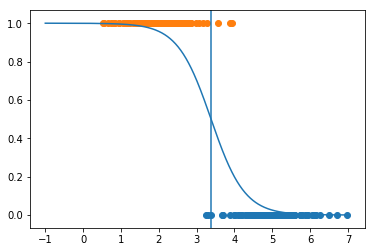

In [126]:
ts = np.arange(-1.0, 7.0, 0.01)
fs=[]
for t in ts:
    s = logistic_function(t,theta0,theta1)
    fs.append(s)
    
# plot the decision boundary
plt.axvline(*YOUR CODE*)

# plot the logistic function with the parameters determined by gradient descent
plt.plot(ts, fs)  
plt.scatter(a,zeros)
plt.scatter(b,ones)

# Logistic Regression (Real World Example)

Now we want to conduct a logistic regression with multiple independent variables.  For that, we load a dataset for skin eczemas.

In [227]:
df=pd.read_csv("skin_disease.csv")

In [228]:
df


,x,y,expertsEczemaVotePatch,expertsEczemaAllVotePatch,expertsEczemaVoteCenterPixel,class,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
0,272,0,0.0,0.0,0.0,1,0.0,1.0,145.589218,136.262619,89.286194,1.444699,1.121440,6.850170,-0.416775,-0.961082,-3.694071,1.782547,1.507777,8.454105
1,273,0,0.0,0.0,0.0,1,0.0,1.0,145.745285,136.358490,89.779877,1.527904,1.150789,6.972225,0.259111,-0.973702,-4.002241,1.891008,1.542660,8.602075
2,274,0,0.0,0.0,0.0,1,0.0,1.0,145.902649,136.442474,90.168144,1.612806,1.174493,6.978986,0.429408,-0.974900,-4.450916,1.988215,1.577558,8.610969
3,275,0,0.0,0.0,0.0,1,0.0,1.0,146.033340,136.516663,90.452774,1.659652,1.190121,6.952057,-0.541607,-0.988754,-4.659405,2.026301,1.597203,8.615275
4,276,0,0.0,0.0,0.0,1,0.0,1.0,146.152237,136.569550,90.808395,1.696972,1.185440,6.971071,-0.723738,-1.007998,-4.903327,2.068065,1.599503,8.667152
5,277,0,0.0,0.0,0.0,1,0.0,1.0,146.276123,136.611938,91.278610,1.738037,1.175478,7.122384,-0.885789,-1.025739,-5.025069,2.101181,1.594661,8.884090
6,278,0,0.0,0.0,0.0,1,0.0,1.0,146.385345,136.647751,91.730499,1.765301,1.161351,7.254130,-1.015578,-1.039858,-5.193051,2.124683,1.587950,9.063601
7,279,0,0.0,0.0,0.0,1,0.0,1.0,146.500000,136.675674,92.202705,1.801526,1.150105,7.457047,-1.107418,-1.039991,-5.175395,2.161330,1.583346,9.336868
8,280,0,0.0,0.0,0.0,1,0.0,1.0,146.591400,136.694626,92.701073,1.816511,1.134632,7.709434,-1.193963,-1.039517,-5.023937,2.178250,1.572738,9.695049
9,281,0,0.0,0.0,0.0,1,0.0,1.0,146.666672,136.724274,93.123459,1.821228,1.126791,7.832952,-1.260795,-1.045498,-5.240110,2.187618,1.567917,9.823102


We remap the class values where 255 is mapped to 1 (eczema) and 1 to 0 (no eczema)
Since the old and new value range overlap (1 occurs in both). We have to remap the values in two steps.

In [229]:
df[df["class"]==255]

,x,y,expertsEczemaVotePatch,expertsEczemaAllVotePatch,expertsEczemaVoteCenterPixel,class,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
199707,1581,264,0.351576,0.331548,0.666667,255,0.0,1.0,146.494949,147.570496,123.753120,1.024450,2.276525,6.830599,-0.555013,-1.694953,-4.654741,1.355021,2.933852,8.378459
199708,1582,264,0.346222,0.328772,0.666667,255,0.0,1.0,146.480072,147.470551,123.545509,1.030061,2.276120,6.857293,-0.525349,-1.708546,-4.402688,1.362632,2.933650,8.376041
199709,1583,264,0.340869,0.325996,0.666667,255,0.0,1.0,146.456284,147.372986,123.336708,1.023529,2.275119,6.875948,-0.520669,-1.685165,-4.046505,1.357429,2.926202,8.385555
199710,1584,264,0.335515,0.322625,0.666667,255,0.0,1.0,146.430099,147.286133,123.111839,1.014481,2.267029,6.855133,-0.513049,-1.637164,-3.627964,1.348934,2.911314,8.358363
199711,1585,264,0.329566,0.318857,0.666667,255,0.0,1.0,146.412262,147.210587,122.867340,1.015439,2.252298,6.799474,-0.497115,-1.584958,-3.139131,1.352170,2.889661,8.303097
199712,1586,264,0.323022,0.314693,0.666667,255,0.0,1.0,146.405716,147.138016,122.609161,1.014853,2.244430,6.718271,-0.481379,-1.555980,-2.648997,1.351534,2.880496,8.206814
199713,1587,264,0.316478,0.310330,0.666667,255,0.0,1.0,146.396194,147.067215,122.372398,1.016852,2.244884,6.641803,-0.473505,-1.516936,-1.657903,1.353069,2.883698,8.144184
199714,1588,264,0.309935,0.305769,0.666667,255,0.0,1.0,146.383102,146.986908,122.151695,1.014845,2.248631,6.559947,-0.458751,-1.448813,1.880746,1.349423,2.880894,8.082142
199715,1589,264,0.302796,0.301010,0.666667,255,0.0,1.0,146.366455,146.901840,121.955978,1.016891,2.253796,6.496452,-0.444578,-1.347276,2.572254,1.350131,2.875577,8.040478
200743,1580,265,0.380131,0.352568,0.666667,255,0.0,1.0,146.518738,147.718613,124.186195,1.033542,2.236987,6.900272,-0.564930,-1.744767,-4.719060,1.364076,2.940129,8.634323


In [230]:
di = {1: 0, 255: 2}
df=df.replace({"class": di})
df[df["class"]==2]

,x,y,expertsEczemaVotePatch,expertsEczemaAllVotePatch,expertsEczemaVoteCenterPixel,class,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
199707,1581,264,0.351576,0.331548,0.666667,2,0.0,1.0,146.494949,147.570496,123.753120,1.024450,2.276525,6.830599,-0.555013,-1.694953,-4.654741,1.355021,2.933852,8.378459
199708,1582,264,0.346222,0.328772,0.666667,2,0.0,1.0,146.480072,147.470551,123.545509,1.030061,2.276120,6.857293,-0.525349,-1.708546,-4.402688,1.362632,2.933650,8.376041
199709,1583,264,0.340869,0.325996,0.666667,2,0.0,1.0,146.456284,147.372986,123.336708,1.023529,2.275119,6.875948,-0.520669,-1.685165,-4.046505,1.357429,2.926202,8.385555
199710,1584,264,0.335515,0.322625,0.666667,2,0.0,1.0,146.430099,147.286133,123.111839,1.014481,2.267029,6.855133,-0.513049,-1.637164,-3.627964,1.348934,2.911314,8.358363
199711,1585,264,0.329566,0.318857,0.666667,2,0.0,1.0,146.412262,147.210587,122.867340,1.015439,2.252298,6.799474,-0.497115,-1.584958,-3.139131,1.352170,2.889661,8.303097
199712,1586,264,0.323022,0.314693,0.666667,2,0.0,1.0,146.405716,147.138016,122.609161,1.014853,2.244430,6.718271,-0.481379,-1.555980,-2.648997,1.351534,2.880496,8.206814
199713,1587,264,0.316478,0.310330,0.666667,2,0.0,1.0,146.396194,147.067215,122.372398,1.016852,2.244884,6.641803,-0.473505,-1.516936,-1.657903,1.353069,2.883698,8.144184
199714,1588,264,0.309935,0.305769,0.666667,2,0.0,1.0,146.383102,146.986908,122.151695,1.014845,2.248631,6.559947,-0.458751,-1.448813,1.880746,1.349423,2.880894,8.082142
199715,1589,264,0.302796,0.301010,0.666667,2,0.0,1.0,146.366455,146.901840,121.955978,1.016891,2.253796,6.496452,-0.444578,-1.347276,2.572254,1.350131,2.875577,8.040478
200743,1580,265,0.380131,0.352568,0.666667,2,0.0,1.0,146.518738,147.718613,124.186195,1.033542,2.236987,6.900272,-0.564930,-1.744767,-4.719060,1.364076,2.940129,8.634323


In [231]:
di = {2: 1}
df=df.replace({"class": di})
df[df["class"]==1]

,x,y,expertsEczemaVotePatch,expertsEczemaAllVotePatch,expertsEczemaVoteCenterPixel,class,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
199707,1581,264,0.351576,0.331548,0.666667,1,0.0,1.0,146.494949,147.570496,123.753120,1.024450,2.276525,6.830599,-0.555013,-1.694953,-4.654741,1.355021,2.933852,8.378459
199708,1582,264,0.346222,0.328772,0.666667,1,0.0,1.0,146.480072,147.470551,123.545509,1.030061,2.276120,6.857293,-0.525349,-1.708546,-4.402688,1.362632,2.933650,8.376041
199709,1583,264,0.340869,0.325996,0.666667,1,0.0,1.0,146.456284,147.372986,123.336708,1.023529,2.275119,6.875948,-0.520669,-1.685165,-4.046505,1.357429,2.926202,8.385555
199710,1584,264,0.335515,0.322625,0.666667,1,0.0,1.0,146.430099,147.286133,123.111839,1.014481,2.267029,6.855133,-0.513049,-1.637164,-3.627964,1.348934,2.911314,8.358363
199711,1585,264,0.329566,0.318857,0.666667,1,0.0,1.0,146.412262,147.210587,122.867340,1.015439,2.252298,6.799474,-0.497115,-1.584958,-3.139131,1.352170,2.889661,8.303097
199712,1586,264,0.323022,0.314693,0.666667,1,0.0,1.0,146.405716,147.138016,122.609161,1.014853,2.244430,6.718271,-0.481379,-1.555980,-2.648997,1.351534,2.880496,8.206814
199713,1587,264,0.316478,0.310330,0.666667,1,0.0,1.0,146.396194,147.067215,122.372398,1.016852,2.244884,6.641803,-0.473505,-1.516936,-1.657903,1.353069,2.883698,8.144184
199714,1588,264,0.309935,0.305769,0.666667,1,0.0,1.0,146.383102,146.986908,122.151695,1.014845,2.248631,6.559947,-0.458751,-1.448813,1.880746,1.349423,2.880894,8.082142
199715,1589,264,0.302796,0.301010,0.666667,1,0.0,1.0,146.366455,146.901840,121.955978,1.016891,2.253796,6.496452,-0.444578,-1.347276,2.572254,1.350131,2.875577,8.040478
200743,1580,265,0.380131,0.352568,0.666667,1,0.0,1.0,146.518738,147.718613,124.186195,1.033542,2.236987,6.900272,-0.564930,-1.744767,-4.719060,1.364076,2.940129,8.634323


We remove the coordinates x,y  and the fields expertsEczemaVotePatch, expertsEczemaAllVotePatch and  expertsEczemaVoteCenterPixel from the dataset. The last three attributes are all derived from the expert labelling and must therefore not be used as features.


In [232]:

del df["x"]
del df["y"]
del df["expertsEczemaVotePatch"]
del df["expertsEczemaAllVotePatch"]
del df["expertsEczemaVoteCenterPixel"]

we split the data into training and test set

In [233]:
train, test = train_test_split(df, test_size=0.2)

Independent and dependent variables are separated

In [234]:

X_train = train.drop('class', axis=1)
X_test = test.drop('class', axis=1)

y_train = train["class"]
y_test = test["class"]

X_train

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13
4697,0.0,1.0,149.405594,136.415543,129.993683,1.015190,0.979857,4.173621,-0.902990,-0.472007,-3.679535,1.514321,1.283190,6.239797
204860,0.0,1.0,145.921478,145.019638,156.111237,1.410346,1.655009,5.777358,1.045754,-0.512495,-2.966764,1.927728,2.043408,7.400052
83448,0.0,1.0,149.084473,137.723373,130.595474,1.188384,0.982407,11.736065,0.877385,0.620168,-11.455584,1.613057,1.335782,15.763539
347398,0.0,1.0,147.080902,144.108856,156.069000,0.646685,1.307344,4.674917,0.156861,0.720437,1.908567,0.890321,1.713015,5.758568
418076,0.0,1.0,146.458054,141.506836,152.544907,1.321423,1.389210,5.570321,-0.610836,-1.146852,5.210399,1.762379,1.907041,7.719188
363822,0.0,1.0,146.432480,141.854248,140.430695,1.410546,1.301007,7.961768,0.892638,0.579021,-6.363182,1.810415,1.774401,10.068274
245000,0.0,1.0,148.358124,146.272461,139.164780,0.789736,1.783528,6.968329,0.818689,1.284819,-5.613755,1.160052,2.328062,8.973692
64121,0.0,1.0,146.089233,138.243896,103.370613,1.351540,1.262180,11.326691,1.072679,0.529917,3.513335,1.678929,1.636616,12.806138
370402,0.0,1.0,147.770370,142.126709,138.175491,1.207592,1.765222,6.977283,1.189484,-1.359469,5.127733,1.924153,2.424715,9.286366
443276,0.0,1.0,146.971451,143.919693,154.584778,1.653980,2.256613,8.167498,1.298678,-1.413144,7.417237,2.386048,2.942089,11.714575


we create the logistic regression object by instantiate the appropriate sklearn class

In [235]:
logReg=*YOUR CODE*

and fit the model to the variables

In [236]:
*YOUR CODE*

We then apply the model to the test data

In [237]:
predictions=logReg.predict(X_test)

As evaluation metrics we use accuracy and F1-Score

In [239]:
accuracy=*YOUR CODE*
fscore=*YOUR CODE*

Finally, both metrics should be printed out

In [ ]:
print ("accuracy: ",accuracy)
print ("f1 score: ",fscore)